## Fashion MNIST Dataset

Fashion MNIST is a benchmark image classification dataset with 60000 training and 10000 test samples of grayscale images of size 28 x 28. There are 10 classes.

| Label | Class Name      |
|------:|-----------------|
| 0     | T-shirt / top   |
| 1     | Trouser         |
| 2     | Pullover        |
| 3     | Dress           |
| 4     | Coat            |
| 5     | Sandal          |
| 6     | Shirt           |
| 7     | Sneaker         |
| 8     | Bag             |
| 9     | Ankle boot      |


In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [19]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


In [20]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)


In [21]:
print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))

image, label = train_dataset[0]
print("Image shape:", image.shape)
print("Label:", label)


Number of training samples: 60000
Number of test samples: 10000
Image shape: torch.Size([1, 28, 28])
Label: 9


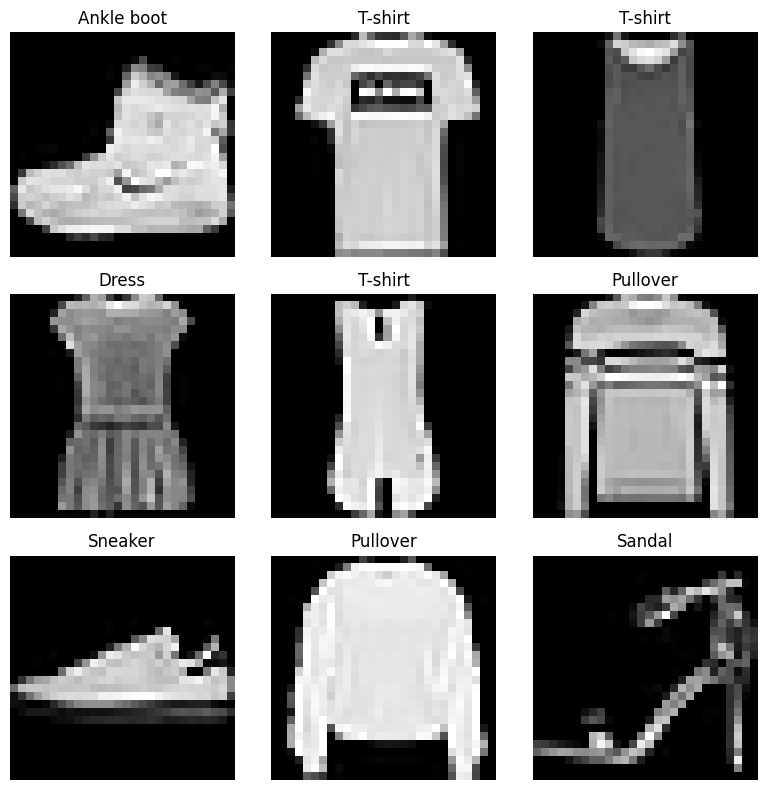

In [22]:
classes = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def show_samples(dataset):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        img, label = dataset[i]
        plt.subplot(3, 3, i + 1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(classes[label])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(train_dataset)


## Multilayer Feedforward Neural Network

A multilayer feedforward neural network consists of an input layer, one or more hidden layers, an output layer. Data flows only in the forward direction.

### Neuron Equation

$
z = Wx + b
$

### ReLU Activation
ReLU (Rectified Linear Unit) is a nonlinear activation function that outputs the input directly if it is positive, otherwise outputs zero.

$
a = \max(0, z)
$

#### Why ReLU?

- Avoids vanishing gradient  
- Faster convergence  
- Works well for deep networks  


In [23]:
class DeepFFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.out(x)
        return x


### Cross Entropy Loss

Cross-entropy loss measures the difference between the true class distribution and the predicted probability distribution.

In [24]:
criterion = nn.CrossEntropyLoss()

In [25]:
import matplotlib.pyplot as plt

def train_model(model, optimizer, epochs=10):
    train_loss = []
    train_acc = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0

        for images, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss.append(running_loss)
        train_acc.append(100 * correct / total)

        print(f"Epoch {epoch+1} | Loss: {running_loss:.3f} | Accuracy: {train_acc[-1]:.2f}%")

    return train_loss, train_acc


### Optimizer
An optimizer is an algorithm used to update the weights and biases of a neural network in order to minimize the loss function during training.

It uses the gradients computed by backpropagation to decide:

- how much to update the parameters

- in which direction to update them

#### SGD Optimizer

Stochastic Gradient Descent updates the model parameters by moving them in the direction opposite to the gradient of the loss function.

Update Equation

$
w_{t+1} = w_t - \eta \nabla L
$

Where:

- $ w_t $ — current weight  
- $ \eta $ — learning rate  
- $ \nabla L $ — gradient of the loss function 

In [26]:
model_sgd = DeepFFNN()
optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=0.01)

loss_sgd, acc_sgd = train_model(model_sgd, optimizer_sgd)


Epoch 1 | Loss: 1258.307 | Accuracy: 56.16%
Epoch 2 | Loss: 589.223 | Accuracy: 77.11%
Epoch 3 | Loss: 497.277 | Accuracy: 80.89%
Epoch 4 | Loss: 451.982 | Accuracy: 82.74%
Epoch 5 | Loss: 424.224 | Accuracy: 83.77%
Epoch 6 | Loss: 402.082 | Accuracy: 84.66%
Epoch 7 | Loss: 384.555 | Accuracy: 85.33%
Epoch 8 | Loss: 370.135 | Accuracy: 85.84%
Epoch 9 | Loss: 357.376 | Accuracy: 86.33%
Epoch 10 | Loss: 345.422 | Accuracy: 86.82%


#### Adam Optimizer

Adam (Adaptive Moment Estimation) is an adaptive optimizer that uses first and second moments of gradients to adjust the learning rate for each parameter.

Update Equations

$
m_t = \beta_1 m_{t-1} + (1 - \beta_1)\nabla L
$

$
v_t = \beta_2 v_{t-1} + (1 - \beta_2)(\nabla L)^2
$

$
w_{t+1} = w_t - \eta \frac{m_t}{\sqrt{v_t} + \epsilon}
$

Where:

- $ m_t $ — first moment (mean of gradients)  
- $ v_t $ — second moment (variance of gradients)  
- $ \eta $ — learning rate  


In [27]:
model_adam = DeepFFNN()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.001)

loss_adam, acc_adam = train_model(model_adam, optimizer_adam)


Epoch 1 | Loss: 488.707 | Accuracy: 81.17%
Epoch 2 | Loss: 355.131 | Accuracy: 86.05%
Epoch 3 | Loss: 316.141 | Accuracy: 87.60%
Epoch 4 | Loss: 294.578 | Accuracy: 88.27%
Epoch 5 | Loss: 278.015 | Accuracy: 88.95%
Epoch 6 | Loss: 259.610 | Accuracy: 89.81%
Epoch 7 | Loss: 249.149 | Accuracy: 90.17%
Epoch 8 | Loss: 238.487 | Accuracy: 90.49%
Epoch 9 | Loss: 227.015 | Accuracy: 91.04%
Epoch 10 | Loss: 215.473 | Accuracy: 91.41%


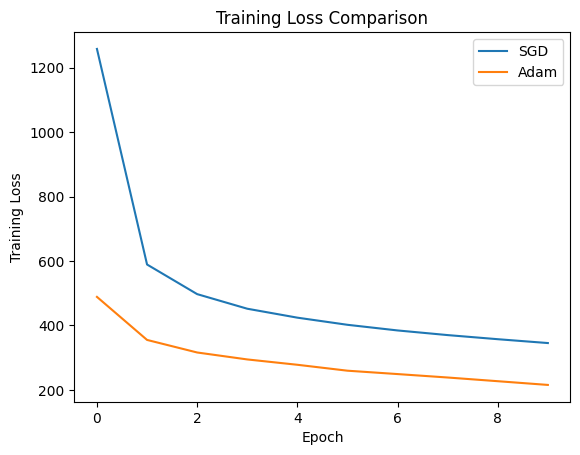

In [28]:
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()


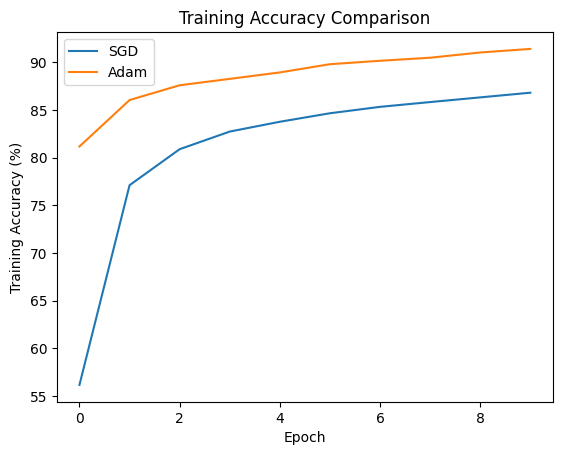

In [29]:
plt.plot(acc_sgd, label="SGD")
plt.plot(acc_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy Comparison")
plt.legend()
plt.show()


In [30]:
def evaluate(model):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total


In [31]:
test_acc_sgd = evaluate(model_sgd)
test_acc_adam = evaluate(model_adam)

print("SGD Test Accuracy:", test_acc_sgd)
print("Adam Test Accuracy:", test_acc_adam)


SGD Test Accuracy: 85.16
Adam Test Accuracy: 88.71


Adam performed better, so it will be chosen for further implementation.

### Forward Pass  

The forward pass computes the network output by propagating the input through all layers.  

Equation (layer $l$)  

$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}, \quad a^{(l)} = f(z^{(l)})
$

- For hidden layers: $ f = \text{ReLU} $  

- For output layer: linear logits  

At the Output  

$
\hat{y} = \text{Softmax}(z)
$

The loss is then computed using cross-entropy:  

$
L = - \sum y \log(\hat{y})
$


### Backward Pass  

The backward pass computes gradients of the loss with respect to all parameters using the chain rule.  

At the Output Layer  

For cross-entropy + softmax:  

$
\frac{\partial L}{\partial z} = \hat{y} - y
$

This error is propagated backward through each layer:  

$
\frac{\partial L}{\partial W^{(l)}} = \frac{\partial L}{\partial z^{(l)}} a^{(l-1)}
$


### Gradient Update (Role of Optimizer)

Gradients are used by the optimizer to update weights to minimize loss.  

General Update Rule  

$
w_{t+1} = w_t - \eta \nabla L
$

- **SGD:** fixed learning rate  
- **Adam:** adaptive learning rate  


## Hyperparameter Experiments and Comparative Analysis

In [32]:
def train_and_eval(lr, batch_size, epochs):
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False
    )

    model = DeepFFNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_loss, train_acc = [], []

    for epoch in range(epochs):
        correct, total, running_loss = 0, 0, 0
        model.train()

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss.append(running_loss)
        train_acc.append(100 * correct / total)

    # Test accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    return train_loss, train_acc, test_acc


In [33]:
expA = train_and_eval(0.01, 32, 10)
expB = train_and_eval(0.001, 64, 10)
expC = train_and_eval(0.001, 64, 20)


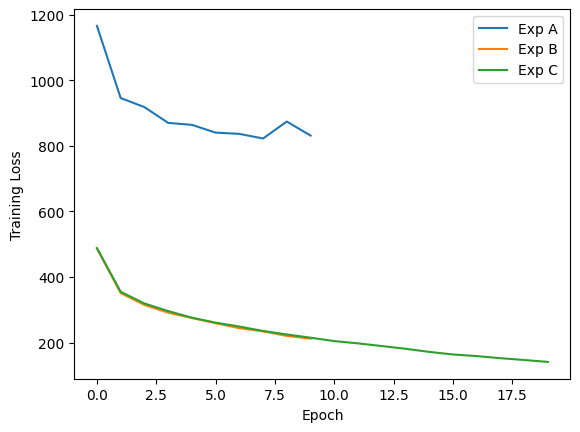

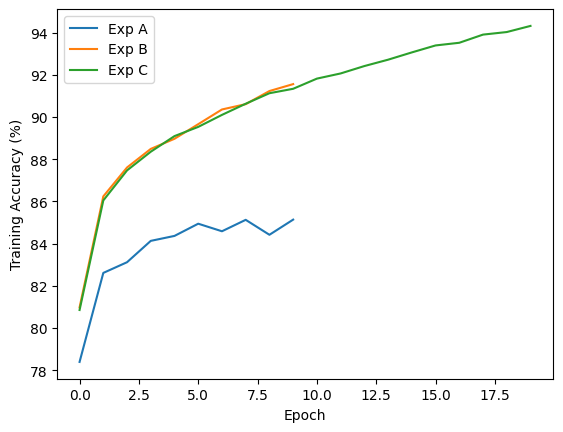

In [34]:
plt.plot(expA[0], label="Exp A")
plt.plot(expB[0], label="Exp B")
plt.plot(expC[0], label="Exp C")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(expA[1], label="Exp A") 
plt.plot(expB[1], label="Exp B")
plt.plot(expC[1], label="Exp C")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy (%)")
plt.legend()
plt.show()


A lower learning rate with sufficient training epochs results in stable convergence and higher accuracy. Adam optimizer effectively minimizes loss and outperforms higher learning rate settings. Therefore, Experiment C provides the best overall performance, i.e., learning rate 0.001, batch size of 64 and 20 epochs.

## Experiment with Network Depth and Width

In [35]:
class FFNN(nn.Module):
    def __init__(self, layers, activation):
        super().__init__()
        self.activation = activation
        modules = []

        for i in range(len(layers)-1):
            modules.append(nn.Linear(layers[i], layers[i+1]))
            if i < len(layers)-2:
                modules.append(activation)

        self.net = nn.Sequential(*modules)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)


In [36]:
def train_model(model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    loss_hist, acc_hist = [], []

    for epoch in range(20):
        correct, total, running_loss = 0, 0, 0
        model.train()

        for x, y in train_loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, pred = torch.max(out, 1)
            total += y.size(0)
            correct += (pred == y).sum().item()

        loss_hist.append(running_loss)
        acc_hist.append(100 * correct / total)

    return loss_hist, acc_hist


In [37]:
models = {
    "M1": FFNN([784,128,10], nn.ReLU()),
    "M2": FFNN([784,256,128,64,10], nn.ReLU()),
    "M3": FFNN([784,512,256,128,64,32,10], nn.ReLU())
}

results = {}
for k, m in models.items():
    results[k] = train_model(m)


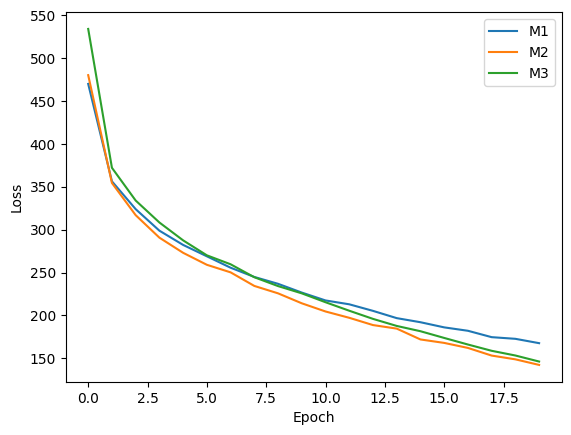

In [38]:
for k in results:
    plt.plot(results[k][0], label=k)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


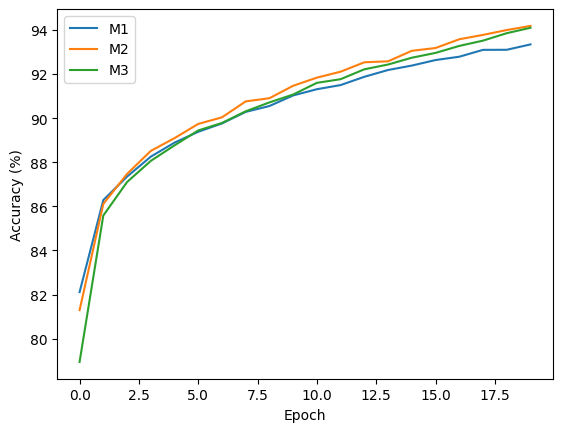

In [39]:
for k in results:
    plt.plot(results[k][1], label=k)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


M1: Fast but low accuracy → underfitting

M2: Best balance → fast convergence + high accuracy

M3: Slower convergence, marginal gain → risk of overfitting

## Activation Function Comparison

In [40]:
activations = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "LeakyReLU": nn.LeakyReLU(0.01)
}

act_results = {}

for name, act in activations.items():
    model = FFNN([784,256,128,64,10], act)
    act_results[name] = train_model(model)


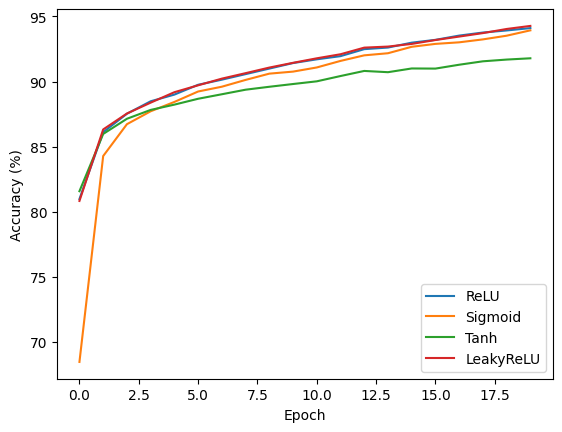

In [41]:
for k in act_results:
    plt.plot(act_results[k][1], label=k)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


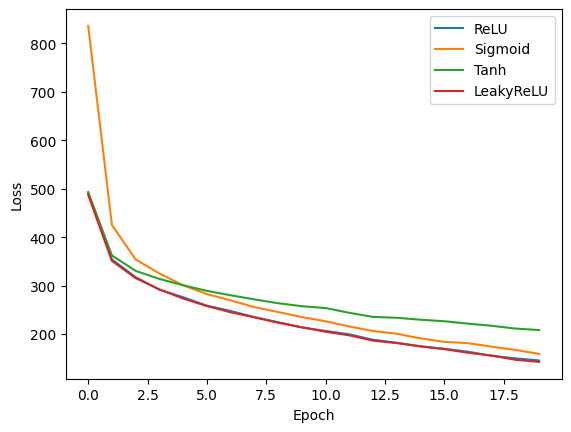

In [42]:
for k in act_results:
    plt.plot(act_results[k][0], label=k)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Hidden Layer Activation Visualization

In [43]:
activations = {}

def hook_fn(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook


In [44]:
model = FFNN([784,256,128,64,10], nn.ReLU())
model.net[1].register_forward_hook(hook_fn("Layer1"))
model.net[3].register_forward_hook(hook_fn("Layer2"))
model.net[5].register_forward_hook(hook_fn("Layer3"))


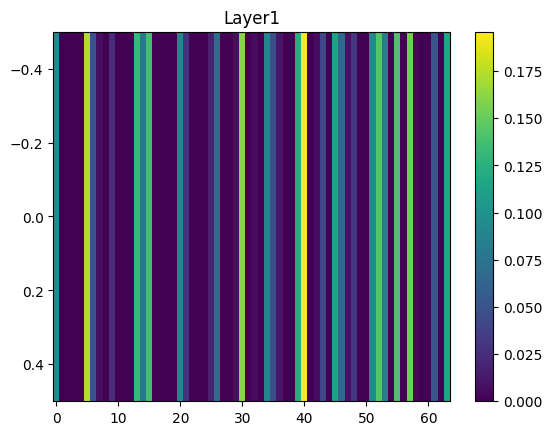

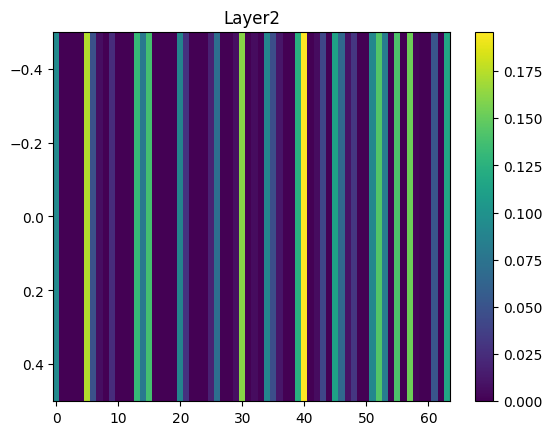

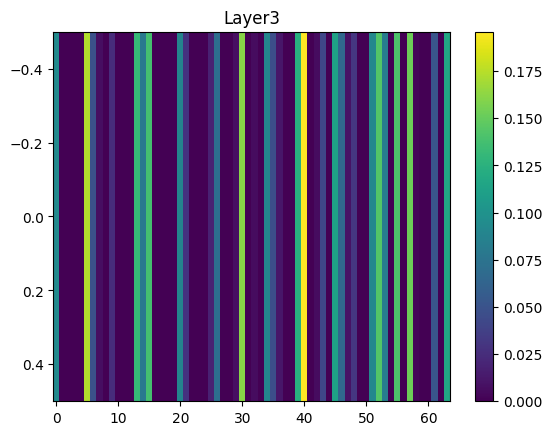

In [45]:
images, _ = next(iter(test_loader))
_ = model(images[:1])

for k in activations:
    plt.figure()
    plt.imshow(activations[k][0].cpu().numpy().reshape(1, -1), aspect="auto")
    plt.title(k)
    plt.colorbar()
    plt.show()
